## Observations and Insights 

In [137]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID","Timepoint"]).count().head()


Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MaskTrue = df.duplicated(subset=['Mouse ID','Timepoint'])
dupl_df = df[MaskTrue]["Mouse ID"].drop_duplicates()

In [5]:
dupl_df

909    g989
Name: Mouse ID, dtype: object

In [6]:
len(df)

1893

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = df.loc[df['Mouse ID'] .isin (dupl_df) == False]
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleandf["Mouse ID"].nunique()

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


mean = cleandf.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleandf.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variance = cleandf.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
Stddev = cleandf.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = cleandf.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Summary_stats_df = pd.DataFrame({"Mean":mean, "Median": median,"Variance": Variance, "Stddev": Stddev,"SEM":SEM})
Summary_stats_df

,Mean,Median,Variance,Stddev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Agg_stats_df = cleandf.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median","var","std","sem"]})

Agg_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

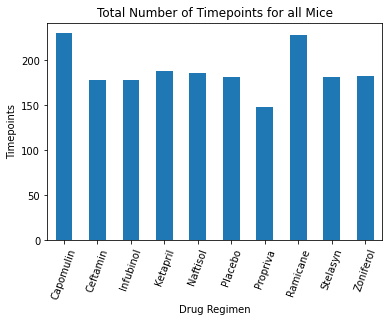

In [166]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
barplot_df = cleandf.groupby("Drug Regimen").count()
barplot_df = barplot_df["Timepoint"]
barplot_df.plot.bar(y='Timepoint', rot=70)
plt.title("Total Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")


In [63]:
barplot_df.index.values

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

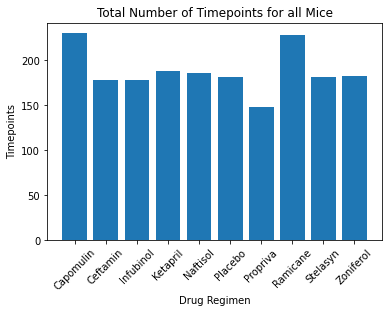

In [172]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x = barplot_df.index.values, height = barplot_df.values)
plt.xticks(rotation=45)
plt.title("Total Number of Timepoints for all Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.show()

Text(0.5, 1.0, 'Distribution of males vs females')

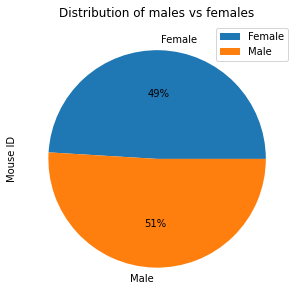

In [174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pieplot_df = cleandf.groupby("Sex").count()
pieplot_df.plot.pie(y = "Mouse ID", figsize=(5, 5), autopct='%1.0f%%')
plt.title("Distribution of males vs females")


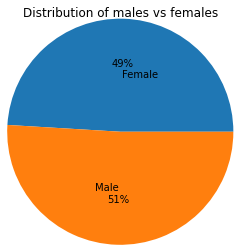

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x = pieplot_df[("Mouse ID")]
y = "Female","Male"
plt.pie(x,labels=y,autopct='%1.f%%', radius =1.3, labeldistance =0.5)
plt.title("Distribution of males vs females")
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Last_TP = cleandf.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
Merge_df = Last_TP.merge(cleandf, how ="left", on = ["Mouse ID","Timepoint"])

Merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
#     Locate the rows which contain mice on each drug and get the tumor volumes    
#     add subset         
#     Determine outliers using upper and lower bounds


DrugReg = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
TumorVolData = []
for Drug in DrugReg:
    Drug_df = Merge_df[Merge_df["Drug Regimen"]== Drug]
Drug_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
3,a275,45,Ceftamin,Female,20,28,62.999356,3
21,b447,0,Ceftamin,Male,2,30,45.000000,0
22,b487,25,Ceftamin,Female,6,28,56.057749,1
25,b759,30,Ceftamin,Female,12,25,55.742829,1
58,f436,15,Ceftamin,Female,3,25,48.722078,2


In [152]:
quartiles = Drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Drug_df is: {lowerq}")
print(f"The upper quartile of Drug_df is: {upperq}")
print(f"The interquartile range of Drug_df is: {iqr}")
print(f"The the median of Drug_df is: {quartiles[0.5]} ")

The lower quartile of Drug_df is: 48.72207785
The upper quartile of Drug_df is: 64.29983003
The interquartile range of Drug_df is: 15.577752179999997
The the median of Drug_df is: 59.85195552 


In [150]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


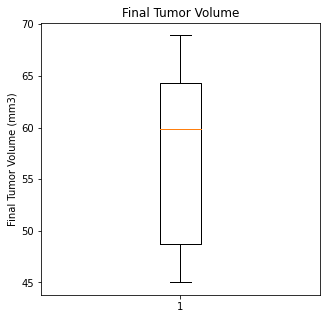

In [165]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.figure(figsize=(5,5))
plt.boxplot(Drug_df["Tumor Volume (mm3)"])
plt.title('Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

danger_drop, = plt.plot(time, danger_drop_speeds, color="red", label="Danger Drop")
plt.title("Coaster Speed Over Time")
plt.xlabel("Coaster Runtime")
plt.ylabel("Speed (MPH)")

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
housing_df.plot(kind="scatter", x="RM", y="MEDV")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

# year = crime_data["year"]
# violent_crime_rate = crime_data["violent crime rate"]

# plt.scatter(year, violent_crime_rate)
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')

# plt.tight_layout()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
